### Step 1: Theoretical Foundation

#### Algorithm Design and Problem Formulation in Data Science

**Algorithm Design:**
- **Definition**: Algorithm design involves creating a step-by-step procedure to solve a specific problem. In data science, this usually means developing a systematic approach to analyze and model data.
- **Importance**: 
  - **Efficiency**: Properly designed algorithms can process large datasets efficiently, saving time and computational resources.
  - **Accuracy**: Well-designed algorithms can extract more meaningful insights from data, leading to more accurate predictions and conclusions.
  - **Scalability**: Algorithms need to be scalable to handle varying sizes and complexities of datasets.

**Problem Formulation:**
- **Definition**: Problem formulation is the process of defining the data science problem clearly and precisely. It involves understanding the business or research question and translating it into an analytical approach.
- **Importance**: 
  - **Clarity**: Clear problem formulation ensures that the data science project is on the right track to answer the intended question.
  - **Direction**: It guides the selection of appropriate algorithms and data processing techniques.
  - **Feasibility**: Helps in assessing whether the problem is solvable with the available data and tools.

#### Critical Importance in Data Science

**Data Quality:**
- The quality of the algorithm's output is heavily dependent on the quality of the input data.
- Poor data quality (e.g., missing values, outliers, irrelevant features) can lead to inaccurate models and misleading results.

**Data Cleaning and Preprocessing:**
- Before applying algorithms, data must be cleaned and preprocessed. This step is critical for removing noise and ensuring that the data is in a suitable format for analysis.
- Techniques such as normalization, handling missing data, and data transformation are essential to prepare the dataset.

**Model Selection and Evaluation:**
- The choice of algorithm depends on the problem type (e.g., classification, regression) and the nature of the data.
- Model evaluation (using metrics like accuracy, precision, recall, F1-score) is crucial to assess the performance and applicability of the model.

**Feedback Loop:**
- Data science is an iterative process. Insights gained from initial models often lead to a refinement of the problem formulation or a change in the algorithm design.
- Continuous evaluation and adjustment are key to achieving optimal results.


### Step 2: Introduction to the Worked Example Problem
# Housing Prices - Boston


## About the Dataset

Boston House Prices Dataset was collected in 1978 and has 506 entries with 14 attributes or features for homes from various suburbs in Boston.

Boston Housing Dataset Attribute Information (in order):<br>
        **CRIM**: per capita crime rate by town<br>
        **ZN**: proportion of residential land zoned for lots over 25,000 sq.ft.<br>
        **INDUS**: proportion of non-retail business acres per town<br>
        **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)<br>
        **NOX**: nitric oxides concentration (parts per 10 million)<br>
        **RM**: average number of rooms per dwelling<br>
        **AGE**: proportion of owner-occupied units built prior to 1940<br>
        **DIS**: weighted distances to five Boston employment centres<br>
        **RAD**: index of accessibility to radial highways<br>
        **TAX**: full-value property-tax rate per 10,000 dollars<br>
        **PTRATIO**: pupil-teacher ratio by town<br>
        **Black**: 1000(Bk - 0.63) power 2 where Bk is the proportion of blacks by town<br>
        **LSTAT**: percentage lower status of the population<br>
        **MEDV**: Median value of owner-occupied homes in 1000 s<br>

## Importing Required Libraries

In [2]:
#importing all the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
import xgboost as xgb


import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [4]:
# Reading the Data from csv file

dc = pd.read_csv("https://raw.githubusercontent.com/KarthikGowdaRamakrishna/Know-Before-You-Buy---Bengaluru-House-Price-Predictor/main/Boston%20Dataset.csv")

In [5]:
dc.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
# Dropping the first column "Unnamed: 0" as it has no significance

dc.drop(columns=['Unnamed: 0'], axis=0, inplace=True)
dc.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
# # Deploying .decribe() method to obtain aggegated values of numeric columns
# Deploying T attribute to Transpose rows and columns

dc.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [28]:
# Checking the datatype of the columns

dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


## Data Preprocessing

In [29]:
# check for missing values

dc.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

**From the above output we can say that there are no missing values in our data**

### Step 3: Analyzing the worked Example

## Exploratory Data Analysis

### Box Plots

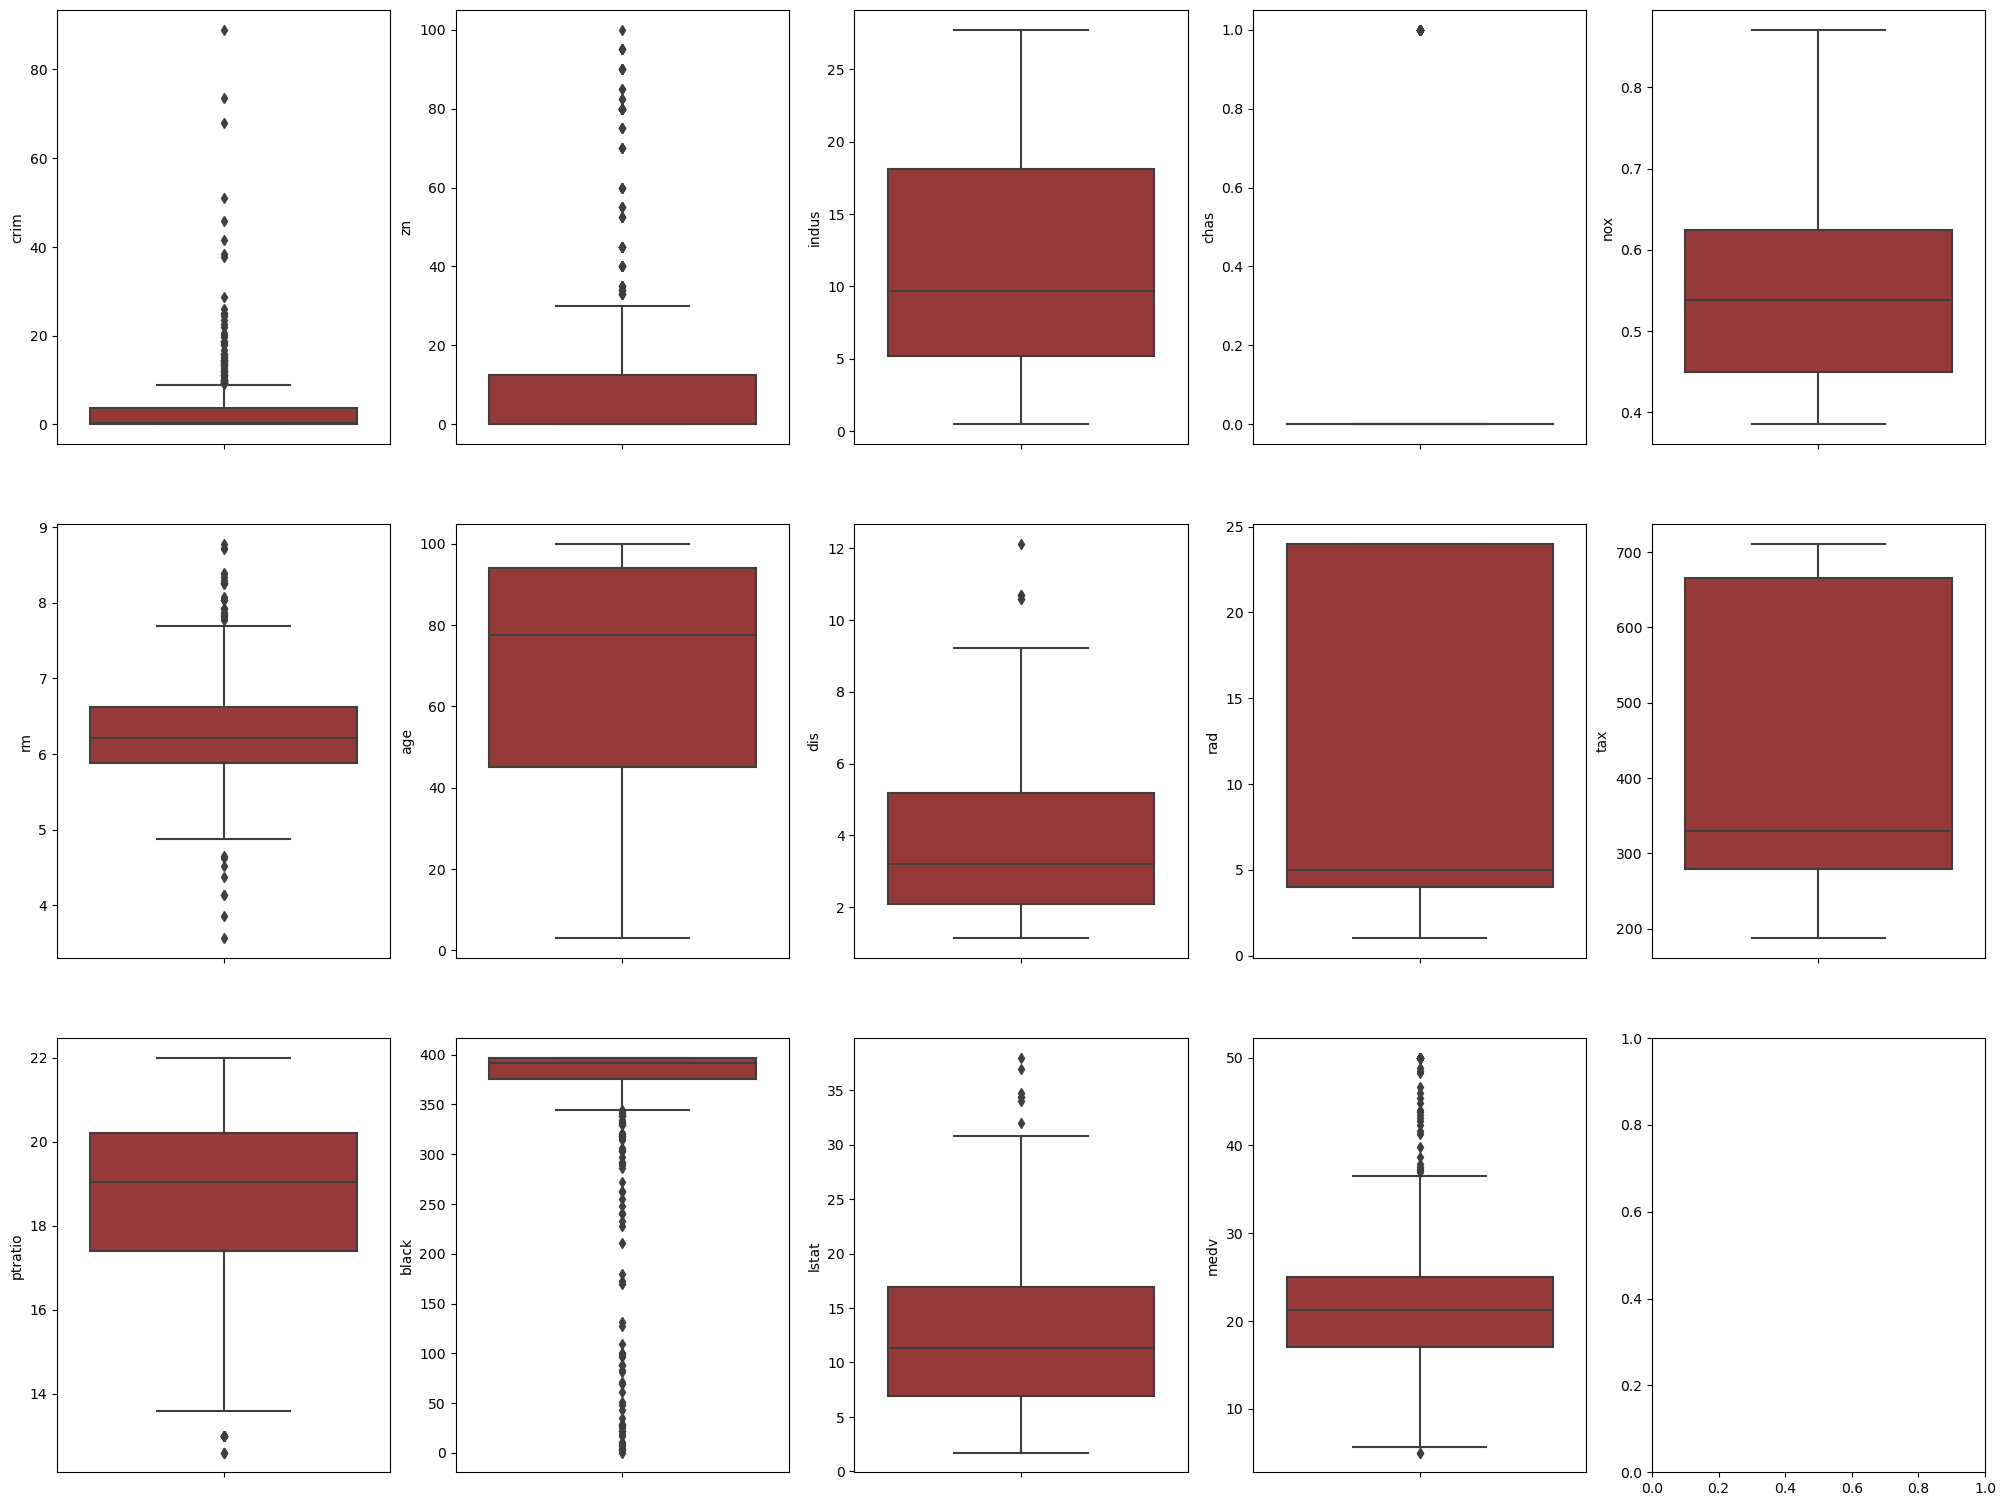

In [30]:
# Creating Box Plots for all the attributes to check if there are any outliers in our data

box_color = 'brown' 
fig, ax = plt.subplots(ncols=5, nrows=3, figsize=(20, 15))
index = 0
ax = ax.flatten()

for col in dc.columns:
    sns.boxplot(y=dc[col], ax=ax[index], color=box_color)
    index += 1

# Adjusting the layout
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

From the graph, it is clearly seen that there are many outliers in columns namely 
* crim - per capita crime rate by town
* zn - proportion of residential land zoned for lots over 25,000 sq.ft
* black - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

**Now to minimize the impact of these outliers in our data, we will conduct normalization method called min-max scaling. It scales the data in such a way that the outliers have less of an extreme effect on the overall dataset**

The below columns also have some outliers but as much as the above mentioned columns
* rm - average number of rooms per dwelling
* medv - Median value of owner-occupied homes in $1000's 


### Distribution Plots

This will give us an understanding about how our data is spread across different ranges and overall data distribution.

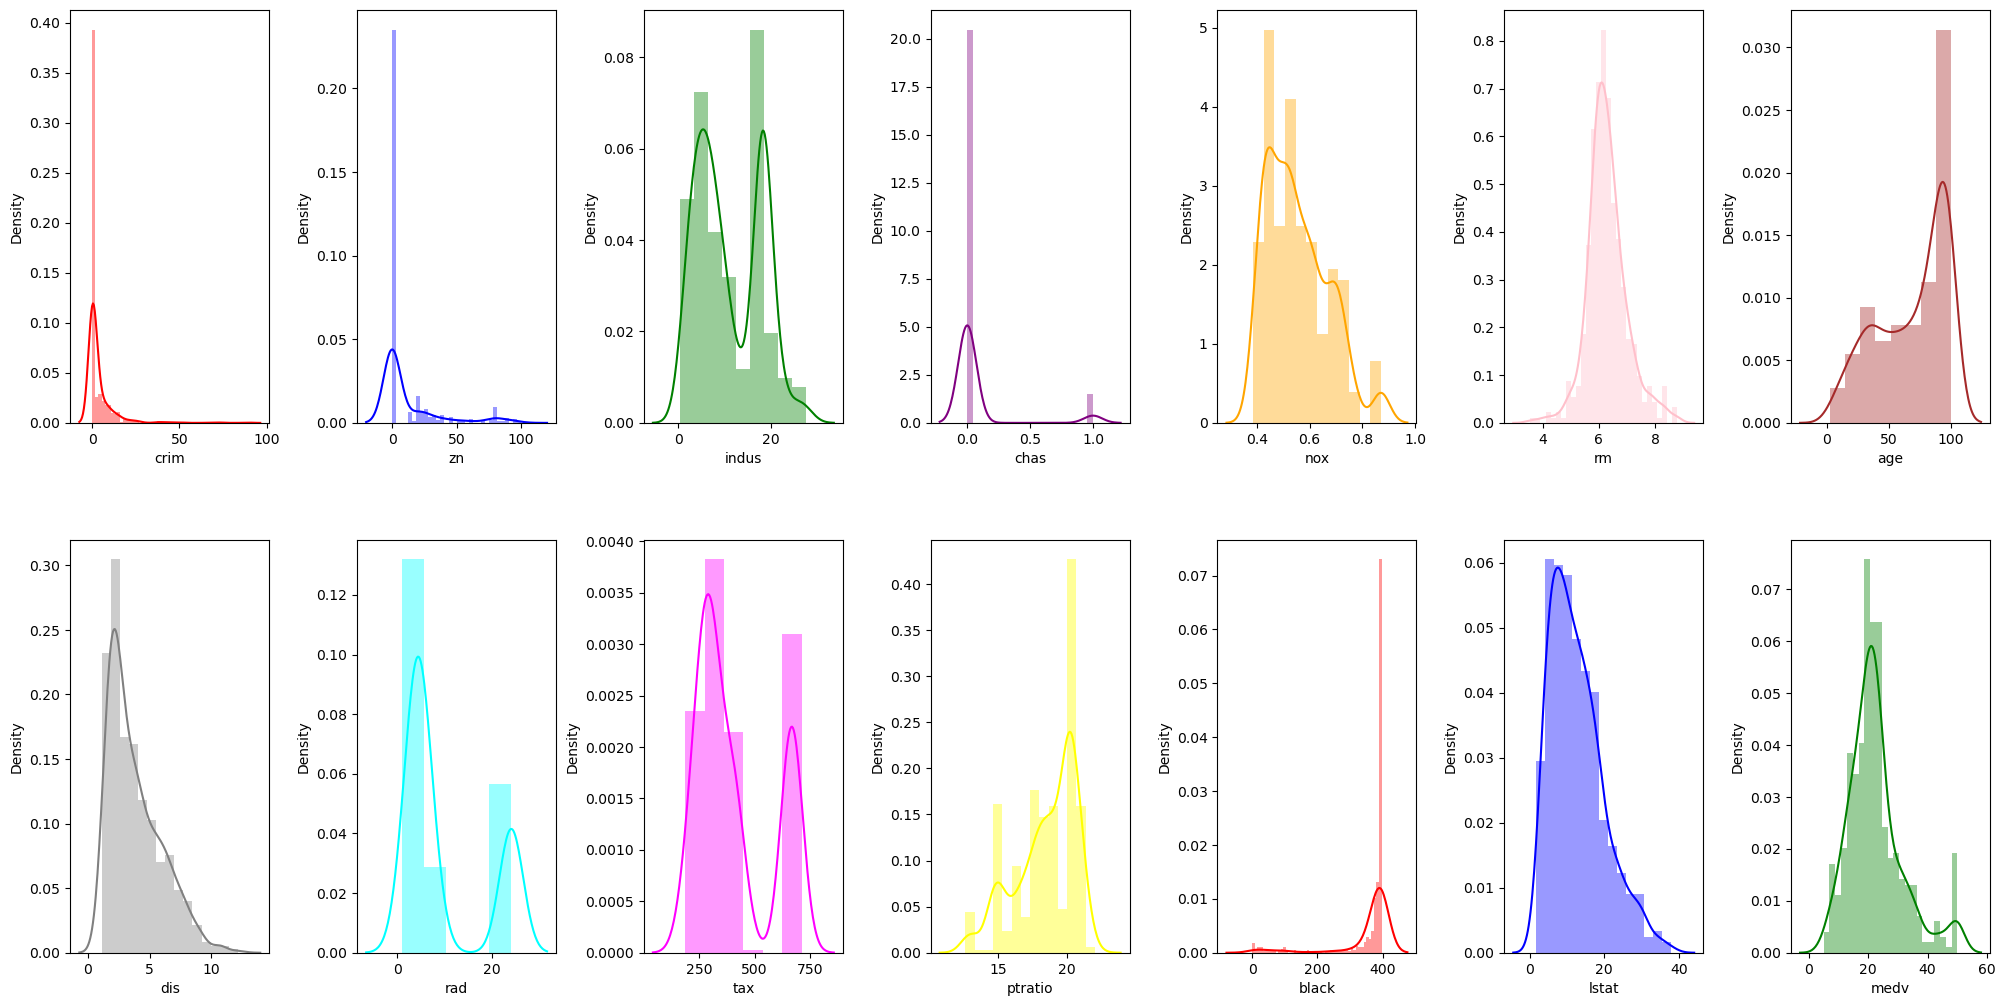

In [31]:
colors = ['red', 'blue', 'green', 'purple', 'orange', 'pink', 'brown', 'gray', 'cyan', 'magenta', 'yellow']

fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in dc.items():
    sns.distplot(value, ax=ax[index], color=colors[index % len(colors)])
    index += 1

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

* The columns "crim", "zn", "dis", "nox", and "lstat" are right skewed
* The columns "rm" and "medv" have normally distributed curves
* The range of "tax" and "black" columns are very high 

We will now conduct min-max scaling for "crim", "zn", "black" and "tax" columns


## Normalization: Min-Max Scaling 

Min-Max Scaling is a method of normalization. This scales all the numeric attributes in the range [0, 1] or [-1, 1]. It's done by subtracting the minimum value and dividing by the range of the dataset. 

In [32]:
cols = ['crim', 'zn', 'tax', 'black']
for col in cols:
    # find minimum and maximum of that column
    minimum = min(dc[col])
    maximum = max(dc[col])
    dc[col] = (dc[col] - minimum) / (maximum - minimum)

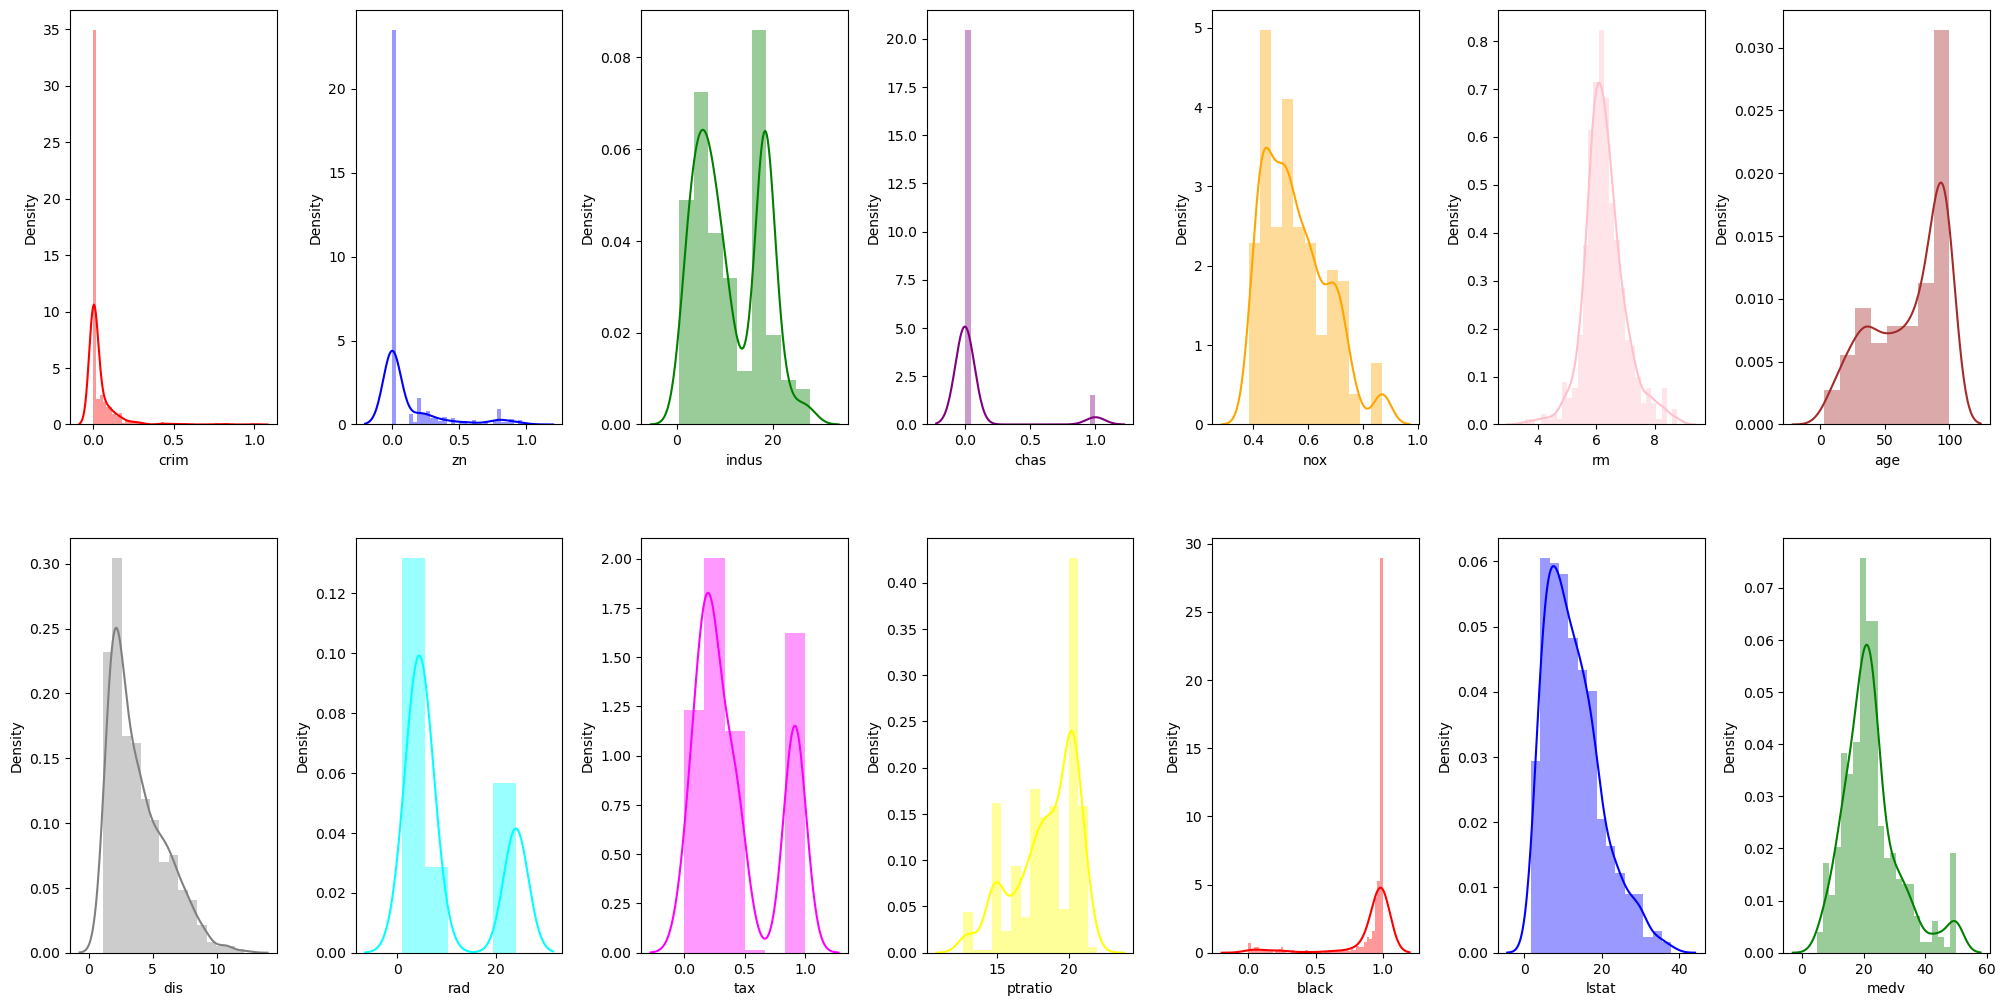

In [33]:
colors = ['red', 'blue', 'green', 'purple', 'orange', 'pink', 'brown', 'gray', 'cyan', 'magenta', 'yellow']

fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in dc.items():
    sns.distplot(value, ax=ax[index], color=colors[index % len(colors)])
    index += 1

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

From the above plots we can see that the range has changed to [0,1] for the "crim", "zn", "black" and "tax" columns.

## Standardization

In [36]:
from sklearn import preprocessing
scalar = preprocessing.StandardScaler()

#Our Data
scaled_cols = scalar.fit_transform(dc[cols])
scaled_cols = pd.DataFrame(scaled_cols, columns=cols)
scaled_cols.head()

,crim,zn,tax,black
0,-0.419782,0.284830,-0.666608,0.441052
1,-0.417339,-0.487722,-0.987329,0.441052
2,-0.417342,-0.487722,-0.987329,0.396427
3,-0.416750,-0.487722,-1.106115,0.416163
4,-0.412482,-0.487722,-1.106115,0.441052


In [37]:
# Assigning the standardized values in the original data frame

for col in cols:
    dc[col] = scaled_cols[col]

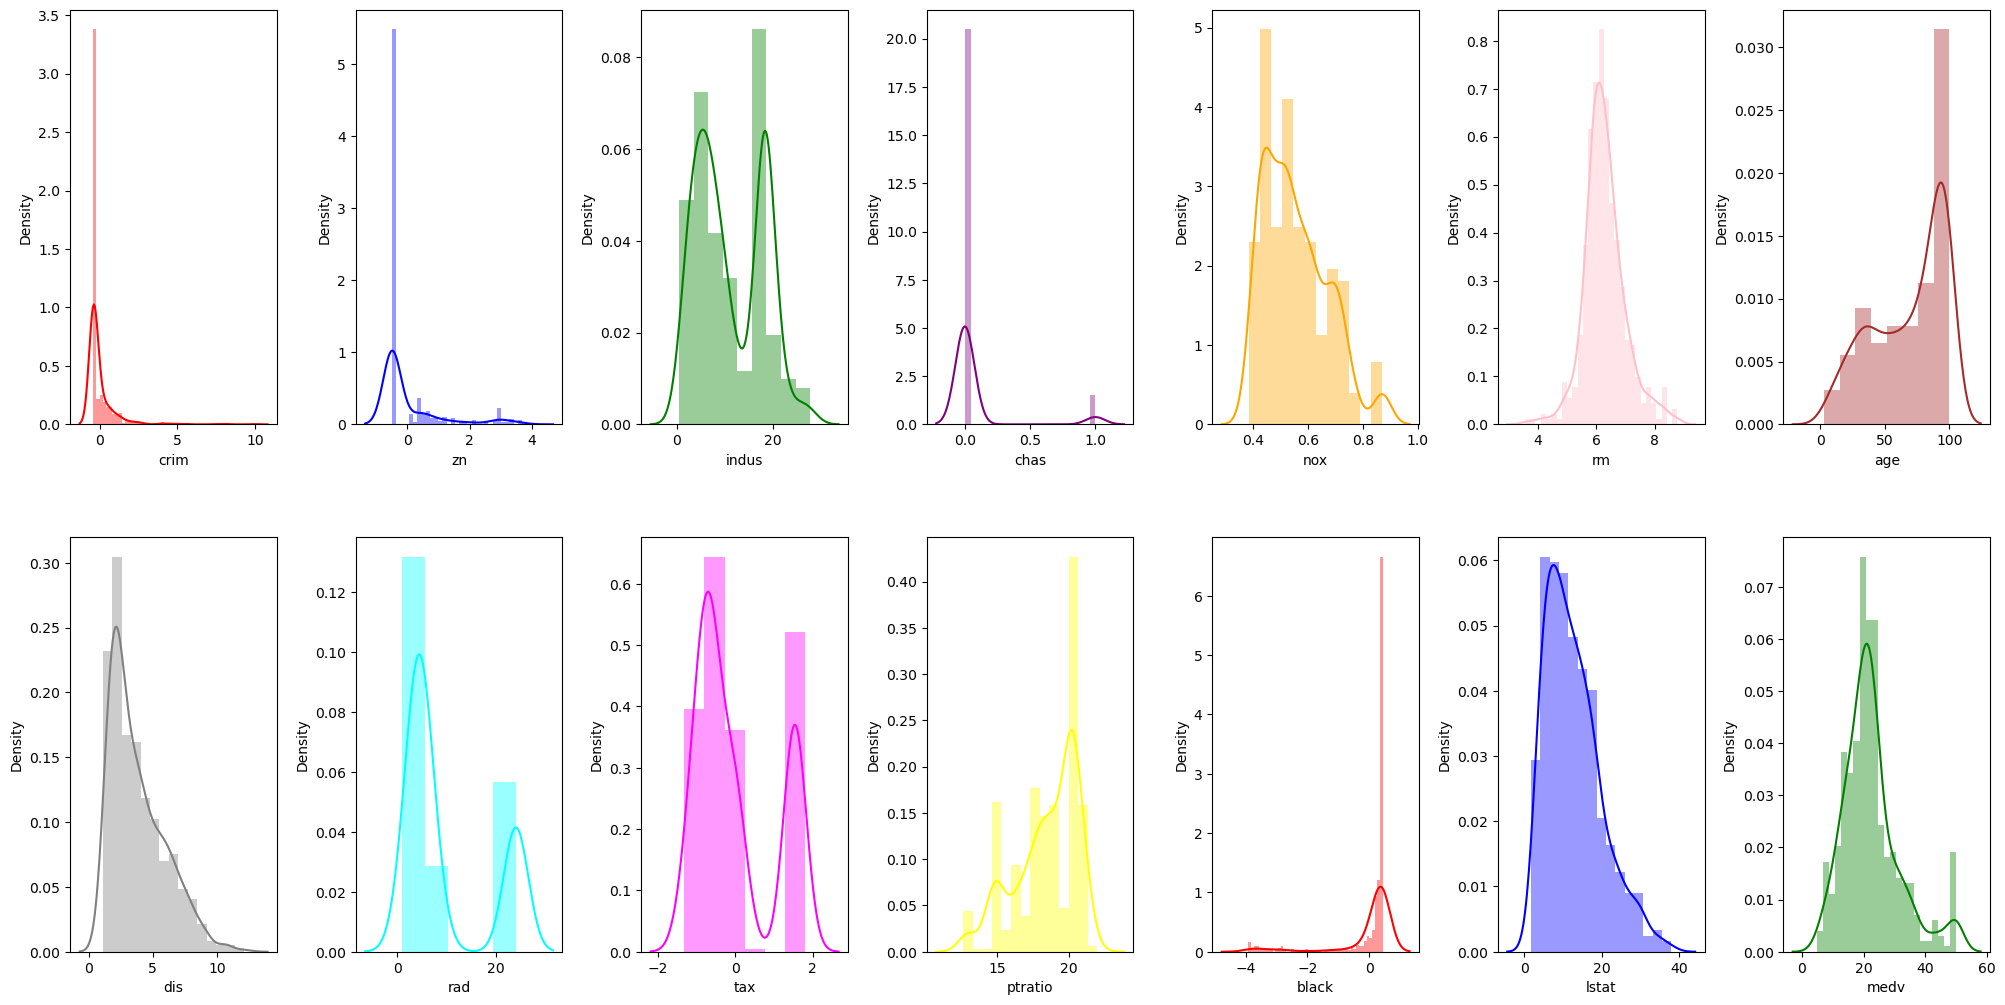

In [38]:
colors = ['red', 'blue', 'green', 'purple', 'orange', 'pink', 'brown', 'gray', 'cyan', 'magenta', 'yellow']

fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in dc.items():
    sns.distplot(value, ax=ax[index], color=colors[index % len(colors)])
    index += 1

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

Even though there is no visible normalization in the curve, standardization will improve the overall model 

## Correlation Matrix

**Considering "medv"(median value of owner-occupied homes) as my target variable/dependent variable for Regression Analysis.**

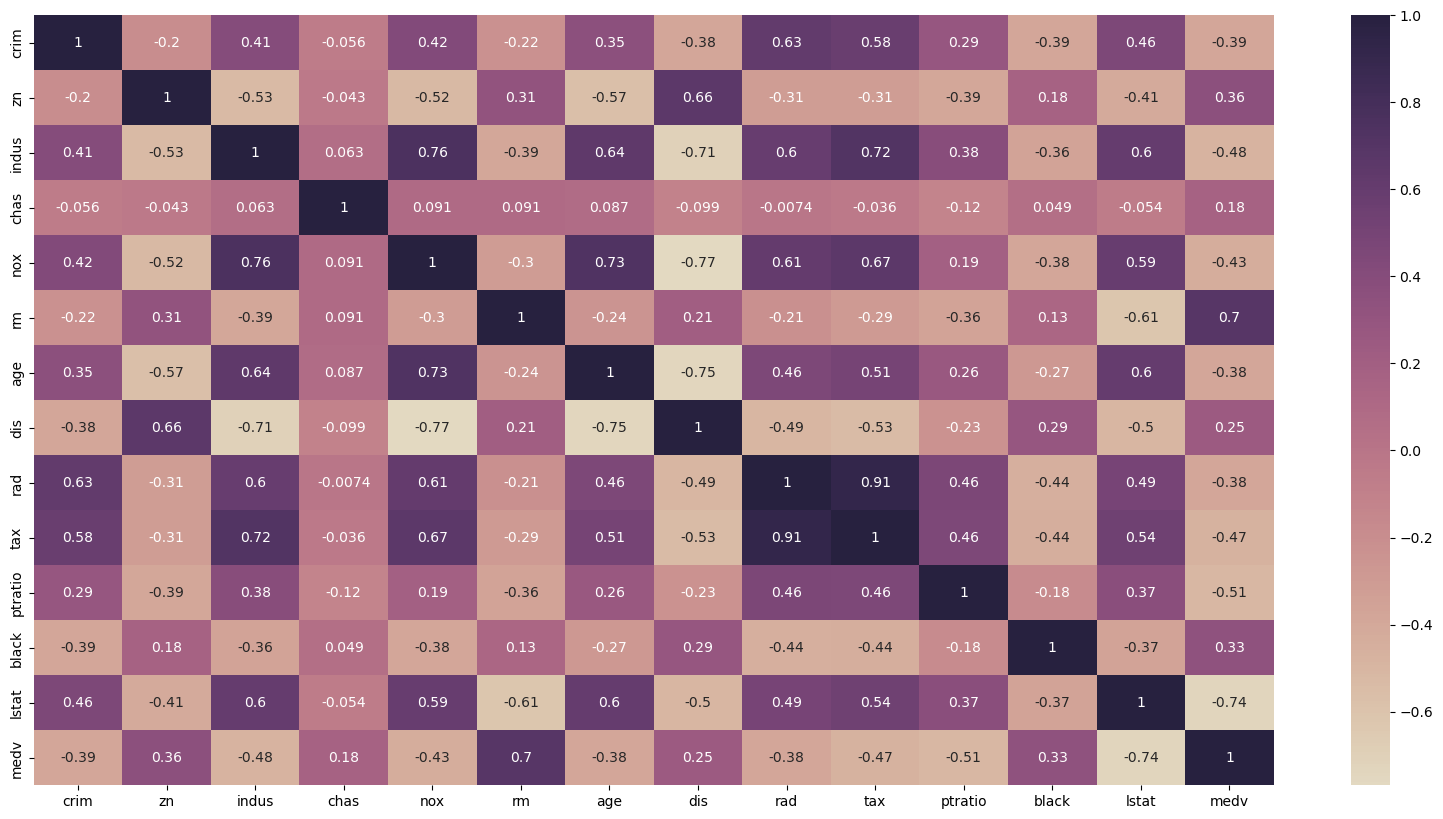

In [39]:
corr = dc.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True),annot=True)
plt.show()

From the correlation matrix, we can infer that:

* The 'rm' column (average number of rooms per dwelling) has a relatively strong positive correlation of 0.7 with 'medv'. This means the median value of the houses is directly proportional to number of rooms.
* The 'lstat' column (% lower status of the population) has a strong negative correlation of -0.74 with 'medv'. This means the median value of the houses is inversly proportional to the lower status of the population in an area
* The variables 'rad' (index of accessibility to radial highways) and 'tax' (full-value property-tax rate per 10,000 dollar) have a very high correlation of 0.91 with each other. Given their high intercorrelation, including both the variables in a regression model would not give us the desired ouput. Therefore, we will be ignoring the 'rad' variable for our model.

<Axes: xlabel='lstat', ylabel='medv'>

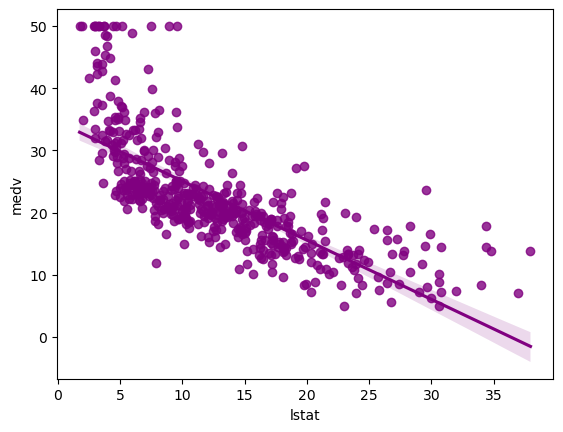

In [40]:
# Displaying the relationship between lstat and medv variable

sns.regplot(y=dc['medv'], x=dc['lstat'], color='purple')

**We can see that the median value of the houses(medv) is inversly proportional to the lower status of the population in an area(lstat). This means as the value of lstat increases, the medv value decreases**

<Axes: xlabel='rm', ylabel='medv'>

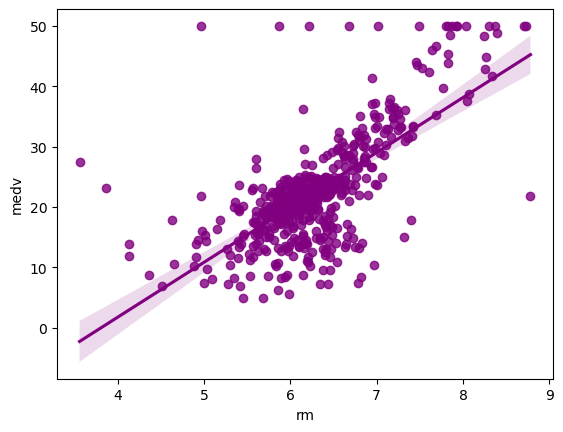

In [41]:
# Displaying the relationship between rm and medv variable

sns.regplot(y=dc['medv'], x=dc['rm'], color='purple')

**We can see that the median value of the houses(medv) is directly proportional to the number of rooms. This means as the value of rm increases, the medv value also increases**

### Step 3: Analyzing the worked Example

### Preparing the data for our model by splitting the data

In [42]:
X = dc.drop(columns=['medv', 'rad'], axis=1)    # Dataset containing features for our model
y = dc['medv']                                  # Target data for our model

## Training the Model

In [59]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

def train(model, X, y):
    
    # Training the model
    x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42)
    model.fit(x_train, y_train)
    
    # Predicting the training set
    pred = model.predict(x_test)      # The trained model makes prediction on the test set
    
    mse = mean_squared_error(y_test, pred)
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    return mse, cv_score

### Linear Regression

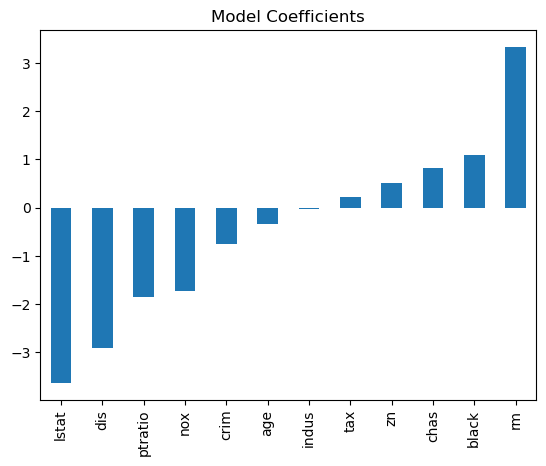

In [60]:
results = []

model = make_pipeline(StandardScaler(), LinearRegression())
mse, cv_score = train(model, X, y)
results.append(['Linear Regression', mse, cv_score])

coef = pd.Series(model.named_steps['linearregression'].coef_, X.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficients')
plt.show()


### Decision Tree

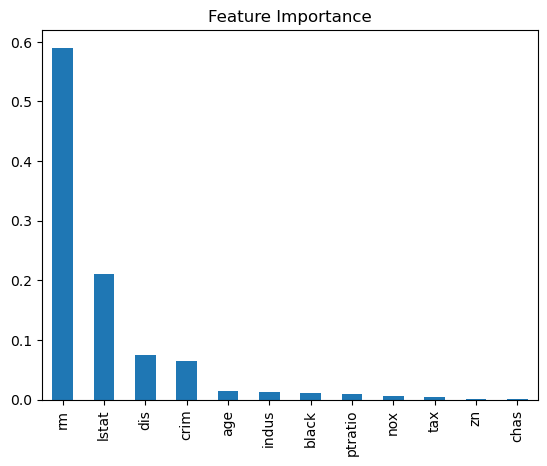

In [61]:
model = DecisionTreeRegressor()
mse, cv_score = train(model, X, y)
results.append(['Decision Tree', mse, cv_score])

coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importance')
plt.show()


### Random Forest

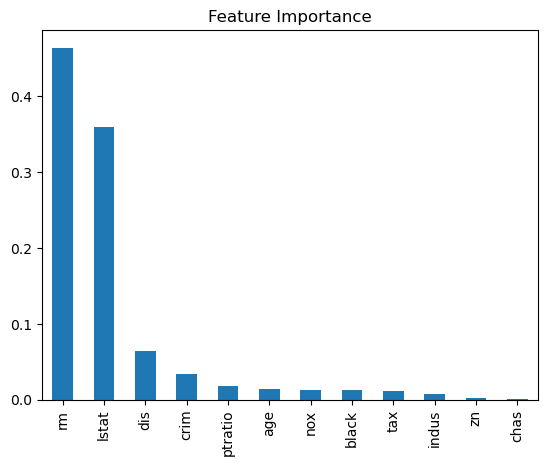

In [62]:
model = RandomForestRegressor()
mse, cv_score = train(model, X, y)
results.append(['Random Forest', mse, cv_score])

coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importance')
plt.show()


### Extra Trees

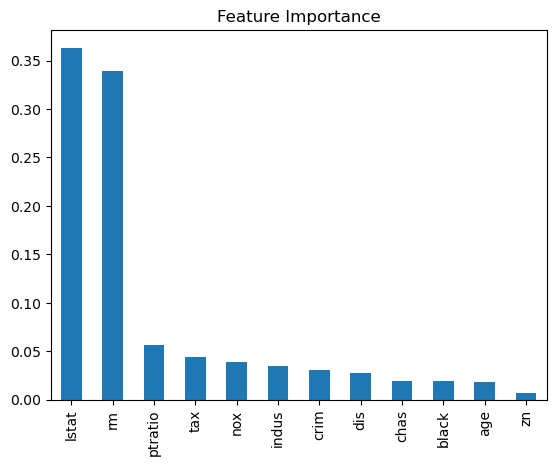

In [63]:
model = ExtraTreesRegressor()
mse, cv_score = train(model, X, y)
results.append(['Extra Trees', mse, cv_score])

coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importance')
plt.show()


### XGBoost

In [64]:
!pip install xgboost

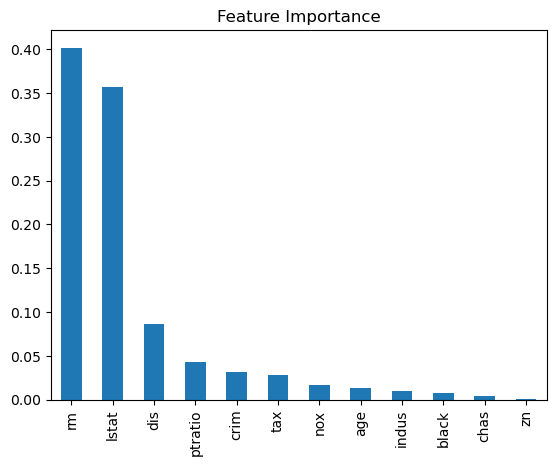

In [65]:
model = xgb.XGBRegressor()
mse, cv_score = train(model, X, y)
results.append(['XGBoost', mse, cv_score])

coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importance')
plt.show()

## Results

In [66]:
results_df = pd.DataFrame(results, columns=['Model', 'MSE Score', 'CV Score'])
print(results_df)


               Model  MSE Score   CV Score
0  Linear Regression  23.871005  35.581366
1      Decision Tree  20.170945  39.299067
2      Random Forest  10.584087  21.350687
3        Extra Trees  11.040282  19.999435
4            XGBoost  11.681987  26.900320


## Performance Evaluation

* **Linear Regression** has the highest Mean Squared Error (MSE) and a high Cross-Validation (CV) Score, which means it has the weakest predictive performance among the models tested for our dataset.

* **Decision Tree Regressor** has a significantly lower MSE compared to Linear Regression, suggesting a better fit. However, its CV Score is the highest among all models, which could imply that the model is overfitting the training data and may not generalize well.

* **Random Forest Regressor** has a slightly lower MSE than the Decision Tree, and a much lower CV Score, indicating it is better at generalizing. This balance of a low MSE and a relatively low CV Score could be a good predictive performance with less overfitting.

* **Extra Trees Regressor** shows a similar pattern to the Random Forest, with a low MSE and the lowest CV Score of all models, which shows a strong performance and good generalization capabilities.

* **XGBoost** has an MSE comparable to the Decision Tree and Random Forest models but has a lower CV Score than the Decision Tree. This suggests that while its predictive performance is strong, it is more generalized than the Decision Tree but less so than the Random Forest and Extra Trees models.

## Conclusion

**Based on the results, the Extra Trees Regressor would be the recommended model to proceed with for our regression task, due to its strong performance in both MSE and CV Score**

### Step 4: Utilizing ChatGPT for In-Depth Exploration

https://chat.openai.com/share/27c4949f-1476-4caa-a9cc-0f9b01b13d9e